<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/Clustering_propagation_in_DenMune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import os.path
import requests
from numpy import genfromtxt
!mkdir data #let us create data folder to hold our data

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune import DenMune

In [5]:
dataset = 'cham_04' # let us take Chameleon DS4 dataset as an example

url = "https://zerobytes.one/denmune_data/"
file_ext = ".txt"
dataset_url = url + dataset + file_ext

data_path = 'data/' # change it to whatever you put your data, set it to ''; so it will retrive from current folder
data_file = data_path + dataset + file_ext #  i.e. 'iris' + '.txt' ==> iris.txt

if  not os.path.isfile(data_path + dataset + file_ext):
    req = requests.get(dataset_url)
    with open(data_path + dataset + file_ext, 'wb') as f:
        f.write(req.content)
data = genfromtxt(data_file , delimiter='\t') 

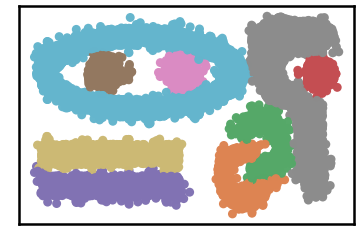

In [8]:
# Denmune's Paramaters
verpose_mode = True # view in-depth analysis of time complexity and outlier detection, num of clusters
show_plot = True  # show plots on/off
show_noise = True # show noise and outlier on/off

knn = 39
from IPython.display import clear_output
for x in range (250, 5500, 250 ):
    print ("itr", x )
    clear_output(wait=True)
    dm = DenMune(data=data, k_nearest=knn, prop_step=x,  verpose=verpose_mode, show_noise=show_noise, rgn_tsne=False )
    labels_pred = dm.fit_predict()
    dm.plot_clusters(labels=labels_pred, show_noise=show_noise)
    #time.sleep(0.2)
    